In [16]:
import pandas as pd
import numpy as np

import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose  # Decomposition
from stldecompose import decompose, forecast             # Decomposition & forecasting
from statsmodels.tsa.holtwinters import ExponentialSmoothing #ETS Models
from statsmodels.tsa.stattools import adfuller
from fbprophet import Prophet #you need to install fbprophet using pip install

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
air=pd.read_csv("AirPassengers.csv")

In [18]:
air.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [19]:
air.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [20]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [21]:
pd.date_range(start='1949-01-01', freq='MS', periods=len(air))

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [22]:
date_range=pd.date_range(start='1949-01-01', freq='MS', periods=len(air))

In [23]:
air.set_index(date_range, inplace=True)

In [24]:
air.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [25]:
air.head()

,Month,#Passengers
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121


In [26]:
air = air.rename(columns={'#Passengers' : 'Passengers'})

In [28]:
air.head()

,Month,Passengers
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121


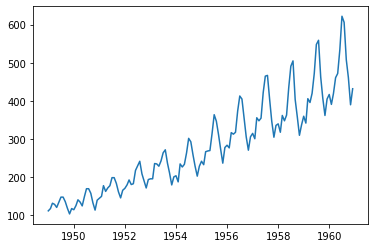

In [29]:
plt.plot(air.Passengers)

In [30]:
decompose = seasonal_decompose(air.Passengers, model='multiplicative', two_sided=False, extrapolate_trend=4)

TypeError: float() argument must be a string or a number, not 'Period'

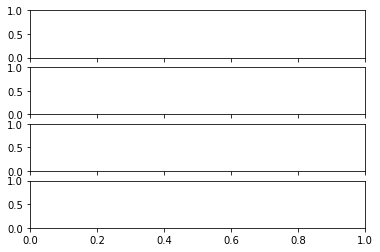

In [32]:
decompose.plot()

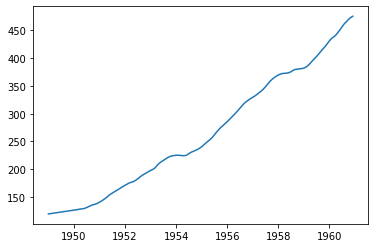

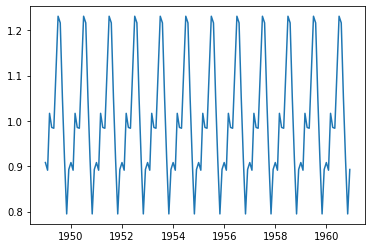

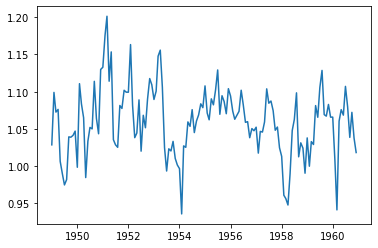

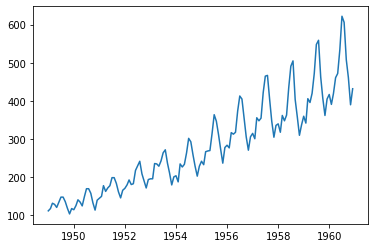

In [91]:
plt.plot(decompose.trend)
plt.show()
plt.plot(decompose.seasonal)
plt.show()
plt.plot(decompose.resid)
plt.show()
plt.plot(decompose.observed)
plt.show()

In [92]:
decompose_data = pd.concat([decompose.trend, decompose.seasonal, decompose.resid, decompose.observed],axis=1)
decompose_data.columns = ['Trend', 'SI', "Irregular", "Actual"]

In [93]:
decompose_data

,Trend,SI,Irregular,Actual
1949-01-01,119.866667,0.908282,1.028724,112
1949-02-01,120.441667,0.891391,1.099099,118
1949-03-01,121.016667,1.016865,1.072668,132
1949-04-01,121.591667,0.985754,1.076260,129
1949-05-01,122.166667,0.983973,1.006582,121
...,...,...,...,...
1960-08-01,461.375000,1.216434,1.079766,606
1960-09-01,465.208333,1.051266,1.038732,508
1960-10-01,469.333333,0.915987,1.072335,461
1960-11-01,472.750000,0.794949,1.037753,390


In [94]:
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import naive, drift, mean, seasonal_naive

In [95]:
ps=air.Passengers

In [96]:

train = ps[:'1959-06-01']
test = ps['1959-07-01':]

In [97]:
decomp = decompose(train, period=12)

In [100]:
fcast = forecast(decomp, steps=6, fc_func =drift ,seasonal=True)

In [101]:
fcast

,drift+seasonal
1959-07-02,453.540125
1959-08-02,453.905446
1959-09-02,415.064621
1959-10-03,382.516891
1959-11-03,353.761550
1959-12-04,380.197998


In [102]:
test

1959-07-01    548
1959-08-01    559
1959-09-01    463
1959-10-01    407
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Freq: MS, Name: Passengers, dtype: int64

In [103]:
np.mean(np.abs(pd.Series(fcast.values.flat) -  pd.Series(test.values.flat))/ pd.Series(test.values.flat))

0.10134357667319573

In [104]:
ps

1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Freq: MS, Name: Passengers, Length: 144, dtype: int64

In [105]:
ps.rolling(window=4).mean()

1949-01-01       NaN
1949-02-01       NaN
1949-03-01       NaN
1949-04-01    122.75
1949-05-01    125.00
               ...  
1960-08-01    558.75
1960-09-01    567.75
1960-10-01    549.25
1960-11-01    491.25
1960-12-01    447.75
Freq: MS, Name: Passengers, Length: 144, dtype: float64

In [106]:
#ETS Models
### single exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# our guessed parameters
alpha = 0.4
beta = 0.2
gamma = 0.01

# initialise model
ets_model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12)
ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

In [107]:
fcast = ets_fit.forecast(steps=6)

In [108]:
np.mean(np.abs(test - fcast)/test)

0.027645712724815138

In [109]:
import auto_holtwinters_UDF

In [111]:
auto_holtwinters_UDF.auto_hwm(ps, val_split_date = '1959-06-01', alpha = np.linspace(0,0.5,5), beta = np.linspace(0,0.5,5), gamma = np.linspace(0,0.5,5), trend='mul', seasonal='mul', periods=12)

Evaluating Exponential Smoothing model for 125 fits



{'alpha': 0.125,
 'beta': 0.5,
 'gamma': 0.375,
 'phi': None,
 'mae': 0.019050763117685696}

In [112]:
alpha = 0.125
beta = 0.5
gamma = 0.25

# initialise model
ets_model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12)
ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

In [113]:
fcast = ets_fit.forecast(steps=6)

np.mean(np.abs(test - fcast)/test)

0.020716685676885175

In [114]:
adfuller(ps)

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [116]:
adfuller(np.log(ps))

(-1.7170170891069714,
 0.4223667747703857,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

In [117]:
adfuller(ps.diff(3).dropna())

(-2.8865058565449635,
 0.04693983572510836,
 10,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 970.9170150837354)

In [118]:
ln_sales_ps = np.log(ps)
adfuller(ln_sales_ps.diff(2).dropna())

(-3.1679073752887454,
 0.021919114564038708,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -431.93712963284486)

In [119]:
ln_sales_ps_diff2 = ln_sales_ps.diff(2).dropna()

TypeError: float() argument must be a string or a number, not 'Period'

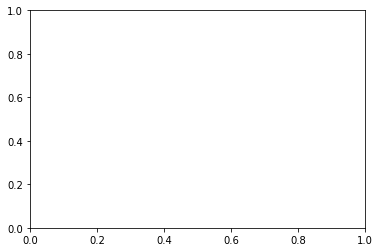

In [121]:
ln_sales_ps_diff2.plot()

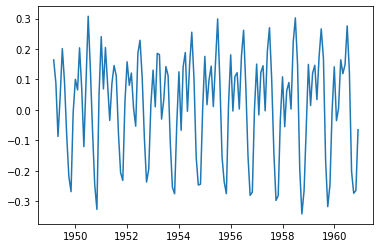

In [122]:
plt.plot(ln_sales_ps_diff2)

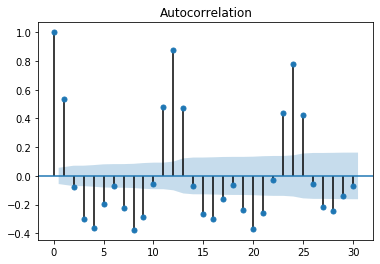

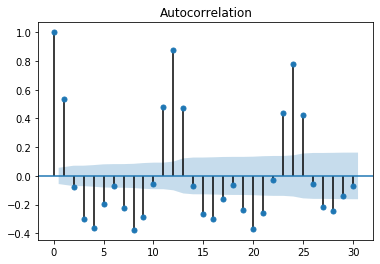

In [124]:
#To find the values of p, q, we need to ACF & PACF. The input time series for ACF & PACF is stationary series
smt.graphics.plot_acf(ln_sales_ps_diff2.dropna(), lags=30,  alpha=0.5)

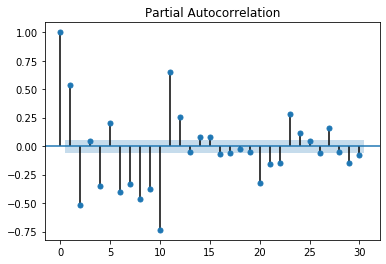

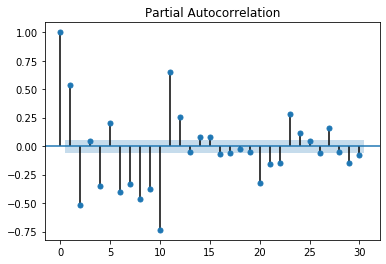

In [126]:
smt.graphics.plot_pacf(ln_sales_ps_diff2.dropna(), lags=30, alpha=0.5, method='ols')

In [127]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(ln_sales_ps, order = (1,2,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

In [128]:
print(model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood                 234.232
Date:                            Tue, 25 Feb 2020   AIC                           -458.464
Time:                                    19:41:04   BIC                           -444.204
Sample:                                01-01-1949   HQIC                          -452.670
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3468      0.071     -4.892      0.000      -0.486      -0.208
ma.L1         -1.0000   1478.630   

In [129]:
import sys
import itertools
import warnings
def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])
    #return best_results

In [130]:
best_results = auto_arima(ln_sales_ps,  p=range(0, 3), d=range(2, 3), q=range(0, 3),
                         P=range(0, 2), D=range(0, 1), Q=range(0, 2))

SARIMAX(0, 2, 0)x(0, 0, 0, 12)12 - AIC:-162.7391468985547
SARIMAX(0, 2, 0)x(0, 0, 1, 12)12 - AIC:-219.92347911834125
SARIMAX(0, 2, 0)x(1, 0, 0, 12)12 - AIC:-310.58259430571457
SARIMAX(0, 2, 0)x(1, 0, 1, 12)12 - AIC:-331.78136893141607
SARIMAX(0, 2, 1)x(0, 0, 0, 12)12 - AIC:-220.5885800935871
SARIMAX(0, 2, 1)x(0, 0, 1, 12)12 - AIC:-287.444342243334
SARIMAX(0, 2, 1)x(1, 0, 0, 12)12 - AIC:-426.22417748877
SARIMAX(0, 2, 1)x(1, 0, 1, 12)12 - AIC:-445.9907885290596
SARIMAX(0, 2, 2)x(0, 0, 0, 12)12 - AIC:-224.6349261941637
SARIMAX(0, 2, 2)x(0, 0, 1, 12)12 - AIC:-285.67153132647127
SARIMAX(0, 2, 2)x(1, 0, 0, 12)12 - AIC:-437.8738237258749
SARIMAX(0, 2, 2)x(1, 0, 1, 12)12 - AIC:-455.83525949005127
SARIMAX(1, 2, 0)x(0, 0, 0, 12)12 - AIC:-173.76579044135968
SARIMAX(1, 2, 0)x(0, 0, 1, 12)12 - AIC:-240.51957477431299
SARIMAX(1, 2, 0)x(1, 0, 0, 12)12 - AIC:-376.28610913335103
SARIMAX(1, 2, 0)x(1, 0, 1, 12)12 - AIC:-399.07285076423676
SARIMAX(1, 2, 1)x(0, 0, 0, 12)12 - AIC:-224.27459774606203
SARIMAX

In [131]:
fct = np.exp(model.forecast(12))

In [135]:
pred_dynamic = model.get_prediction(start=pd.to_datetime('1960-01-01'), full_results=True)

In [136]:
actual_1year = ps['1960-01-01':]
actual_1year

1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Freq: MS, Name: Passengers, dtype: int64

In [137]:
pred_1year = np.exp(pred_dynamic.predicted_mean)
pred_1year

1960-01-01    420.574921
1960-02-01    398.183843
1960-03-01    459.856034
1960-04-01    420.187490
1960-05-01    460.334314
1960-06-01    549.375677
1960-07-01    613.128193
1960-08-01    625.407055
1960-09-01    512.588208
1960-10-01    444.698864
1960-11-01    400.436637
1960-12-01    439.631386
Freq: MS, dtype: float64

In [138]:
np.mean(np.abs(actual_1year-pred_1year)/actual_1year)

0.03330641494357197

In [139]:
model.forecast(36)

1961-01-01    6.105368
1961-02-01    6.047761
1961-03-01    6.166100
1961-04-01    6.193260
1961-05-01    6.226271
1961-06-01    6.362772
1961-07-01    6.501537
1961-08-01    6.496713
1961-09-01    6.317198
1961-10-01    6.200469
1961-11-01    6.053805
1961-12-01    6.158456
1962-01-01    6.194484
1962-02-01    6.136838
1962-03-01    6.255158
1962-04-01    6.282224
1962-05-01    6.315109
1962-06-01    6.451731
1962-07-01    6.590618
1962-08-01    6.585595
1962-09-01    6.405487
1962-10-01    6.288307
1962-11-01    6.141123
1962-12-01    6.245821
1963-01-01    6.281740
1963-02-01    6.223776
1963-03-01    6.342173
1963-04-01    6.369112
1963-05-01    6.401881
1963-06-01    6.538622
1963-07-01    6.677633
1963-08-01    6.672409
1963-09-01    6.491707
1963-10-01    6.374074
1963-11-01    6.226370
1963-12-01    6.331114
Freq: MS, dtype: float64